In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle/

In [ ]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22326        617  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1082         28  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2573         59  1.0              
darshanprabhu09/stock-prices-f

In [ ]:
! kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 98% 63.0M/64.4M [00:02<00:00, 33.2MB/s]
100% 64.4M/64.4M [00:02<00:00, 26.4MB/s]


In [ ]:
! unzip /content/drive/MyDrive/kaggle/cats-and-dogs-image-classification.zip -d archive

Archive:  /content/drive/MyDrive/kaggle/cats-and-dogs-image-classification.zip
  inflating: archive/test/cats/cat_1.jpg  
  inflating: archive/test/cats/cat_106.jpg  
  inflating: archive/test/cats/cat_109.jpg  
  inflating: archive/test/cats/cat_113.jpg  
  inflating: archive/test/cats/cat_114.jpg  
  inflating: archive/test/cats/cat_116.jpg  
  inflating: archive/test/cats/cat_118.jpg  
  inflating: archive/test/cats/cat_119.jpg  
  inflating: archive/test/cats/cat_124.jpg  
  inflating: archive/test/cats/cat_140.jpg  
  inflating: archive/test/cats/cat_147.jpg  
  inflating: archive/test/cats/cat_156.jpg  
  inflating: archive/test/cats/cat_158.jpg  
  inflating: archive/test/cats/cat_162.jpg  
  inflating: archive/test/cats/cat_18.jpg  
  inflating: archive/test/cats/cat_190.jpg  
  inflating: archive/test/cats/cat_203.jpg  
  inflating: archive/test/cats/cat_223.jpg  
  inflating: archive/test/cats/cat_234.jpg  
  inflating: archive/test/cats/cat_244.jpg  
  inflating: archive/tes

In [ ]:
import os
import zipfile

# Specify the path to the downloaded zip file
zip_file_path = '/content/gdrive/My Drive/archive.zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall("/content")


In [ ]:
import zipfile

# Unzip the dataset
local_zip = '/content/gdrive/My Drive/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./archive')
zip_ref.close()


In [ ]:
import os
# Directory with our training cat pictures
train_cat_dir = './drive/MyDrive/kaggle/archive/train/cats'

# Directory with our training dog pictures
train_dog_dir = './drive/MyDrive/kaggle/archive/train/dogs'

train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])


['cat_87.jpg', 'cat_10.jpg', 'cat_274.jpg', 'cat_498.jpg', 'cat_247.jpg', 'cat_64.jpg', 'cat_219.jpg', 'cat_165.jpg', 'cat_228.jpg', 'cat_518.jpg']
['dog_589.jpg', 'dog_505.jpg', 'dog_205.jpg', 'dog_471.jpg', 'dog_31.jpg', 'dog_39.jpg', 'dog_72.jpg', 'dog_139.jpg', 'dog_512.jpg', 'dog_405.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))


total training cat images: 279
total training dog images: 278


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

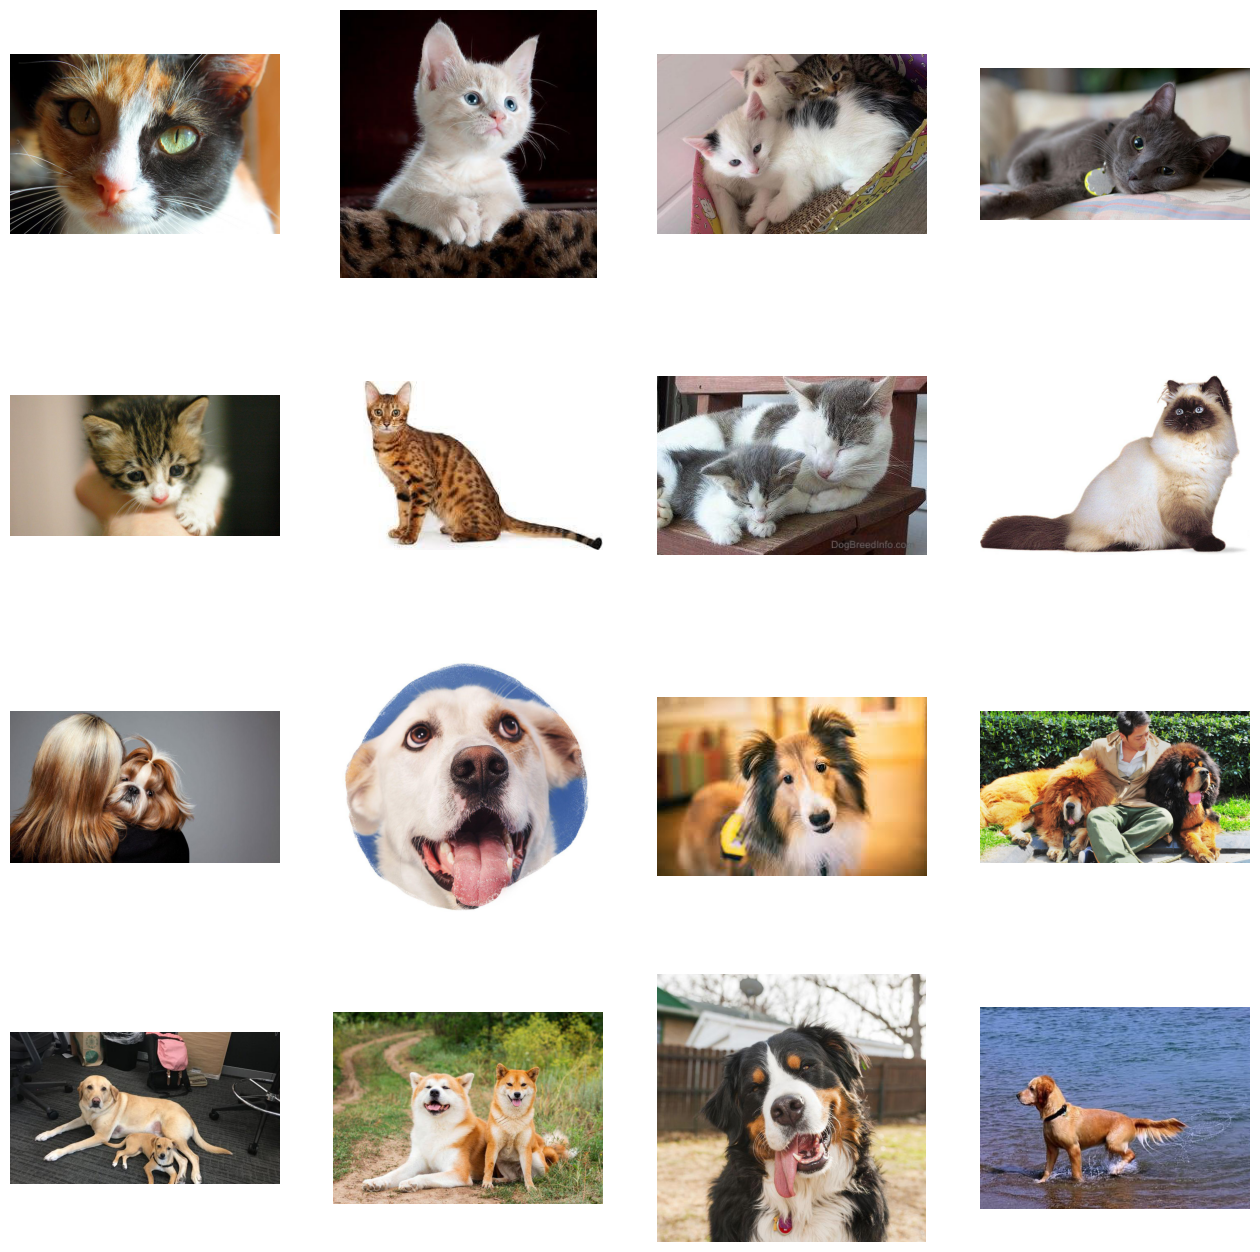

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './drive/MyDrive/kaggle/archive/train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 557 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
5/8 [=================>............] - ETA: 55s - loss: 0.7046 - accuracy: 0.5189 

8/8 [==============================] - 84s 10s/step - loss: 0.7046 - accuracy: 0.5189


In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes[0])
    
  if classes[0]>=0.48:
    print(fn + " is a cat")
  else:
    print(fn + " is a dog")
 